In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf

In [4]:
x_data = np.linspace(0.0,1.0,1000000)

In [5]:
noise = np.random.rand(len(x_data))

In [6]:
noise.shape

(1000000,)

In [7]:
y_true =(0.5 * x_data) +5 + noise

In [9]:
x_df = pd.DataFrame(data= x_data, columns=['X Data'])
y_df = pd.DataFrame(data= y_true, columns=['Y'])
y_df.head()

,Y
0,5.639197
1,5.560699
2,5.595553
3,5.880606
4,5.098559


In [10]:
my_data = pd.concat([x_df, y_df], axis =1)

In [13]:
my_data.head()

,X Data,Y
0,0.000000,5.639197
1,0.000001,5.560699
2,0.000002,5.595553
3,0.000003,5.880606
4,0.000004,5.098559


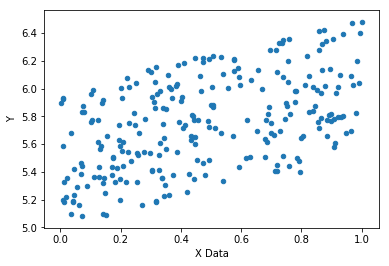

In [15]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y' )

In [16]:
batch_size = 8

In [38]:
m = tf.Variable(0.81)
b = tf.Variable(0.17)

In [39]:
np.random.rand(1,2)

array([[ 0.08846461,  0.99971798]])

In [40]:
xph = tf.placeholder(tf.float32, [batch_size])

In [41]:
yph = tf.placeholder(tf.float32, [batch_size])

In [42]:
y_model = m*xph + b

In [43]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [44]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [45]:
init = tf.global_variables_initializer()

In [52]:
with tf.Session() as sess : 
    sess.run(init)
    batches = 10000
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {xph:x_data[rand_ind], yph: y_true[rand_ind]}
        sess.run(train, feed_dict = feed)
    model_m ,  model_b = sess.run([m,b])

In [53]:
model_m

0.50520277

In [54]:
model_b

5.5028033

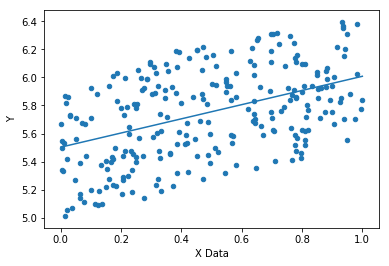

In [55]:
y_hat = x_data*model_m +model_b
my_data.sample(250).plot(kind='scatter', x = 'X Data', y = 'Y')
plt.plot(x_data, y_hat)